In [16]:
%load_ext autoreload
%autoreload 2
import matplotlib.pylab as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Check runner 

In [37]:
import runner

In [65]:
newDict = runner.simulation()

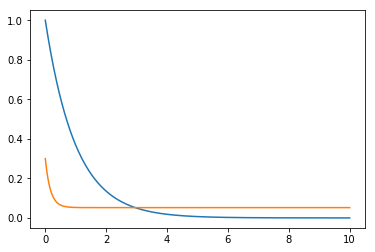

In [66]:
data = newDict['data']
plt.plot(data['t'],data['Nai'])
plt.plot(data['t'],data['Cai'])

### CHeck main IO routines 

In [68]:
import analyze

In [76]:
dataSub = analyze.GetData(data,"Nai")

In [77]:
result = analyze.ProcessDataArray(dataSub,"mean",[8,10],None,"Nai")

In [79]:
print(result)

0.000145949183576


### Check sampler 

In [87]:
import fittingAlgorithm
from fittingAlgorithm import outputObj
outputListDefault = { "Cai":outputObj("Cai","mean",[800,1000],
                       0.1),          # value you want 
                      "Nai":outputObj("Nai","val_vs_time",[  0, 200],
                      [1,0.5,0.15],timeInterpolations=[  0,100,200]) # check that interpolated values at 0, 100, 200 are 1, 0.5 ... 
                    }


TabError: inconsistent use of tabs and spaces in indentation (fittingAlgorithm.py, line 420)